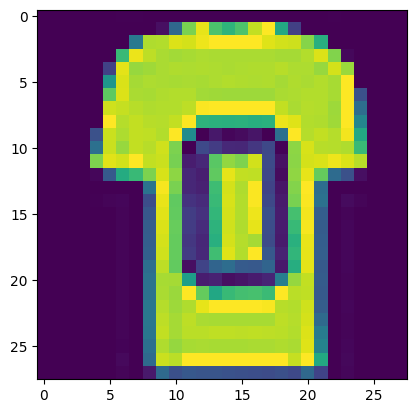

In [10]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from sklearn.svm import SVC
import pickle
from skimage.feature import hog


# Loading the data from CSV files
# insert custom datasets here

Xtr = np.loadtxt("/content/drive/MyDrive/TrainData.csv")
Ytr = np.loadtxt("/content/drive/MyDrive/TrainLabels.csv")
Xts = np.loadtxt("/content/drive/MyDrive/TestData.csv")
# Convert the labels in data to numeric values
Ytr = Ytr.astype(int)

# Reshape the data to image format (images provided are originally 28x28 grayscale)
train_data_images = Xtr.reshape(-1, 28, 28)

# For visualization
plt.imshow(Xtr[10].reshape([28,28]))



In [11]:
#techniques used HOG and pixel intensity
def extract_features(images, method='hog'):
    features = []
    for image in images:
        if method == 'hog':
            # Resize the image to a smaller size for faster processing
            resized_image = resize(image, (16, 16))
            
            # Extract Histogram of Oriented Gradients (HOG) features
            hog_features = hog(resized_image, orientations=9, pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), visualize=False)
            
            features.append(hog_features)
        
        elif method == 'edges':
            # Your edge extraction logic here
            pass
        
        elif method == 'color_channels':
            # Your color channel extraction logic here
            pass
        
        elif method == 'midpoints':
            # Your midpoint extraction logic here
            pass
        
        else:
            feature = extract_pixel_intensity(image)
            features.append(feature)

    features = np.array(features)

    return features

def extract_pixel_intensity(image):
    return image.flatten()

# extract features from training and test sets
X_train_features = extract_features(train_data_images)
X_test_features = extract_features(Xts)
                                   


In [12]:
## Define the hyperparameters for the model
C = 1  # Regularization parameter
kernel = 'rbf'  # Kernel type

# Train the model using the entire dataset
model = SVC(C=C, kernel=kernel)
model.fit(X_train_features, Ytr)

# Saving the final model
filename = 'final_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print("Final model saved as", filename)

# Generate predictions for the test examples
test_predictions = model.predict(X_test_features)

# Save the predictions to a CSV file
np.savetxt("myPredictions.csv", test_predictions, delimiter=",", fmt="%d")

print("Predictions saved to myPredictions.csv")


Final model saved as final_model.pkl
Predictions saved to myPredictions.csv
